# Use Rooki to access CMIP6 data

[Rooki](https://github.com/roocs/rooki) is a Python client to interact with [Rook](https://github.com/roocs/rook) data subsetting service for climate model data. This service is used in the backend by the [Climate Data Store](https://cds.climate.copernicus.eu) to access the CMIP6 data pool. The Rook service is deployed for load-balancing at CEDA (UK), IPSL (FR) and DKRZ (DE). The CMIP6 data pool is shared with ESGF. The provided CMIP6 subset for Copernicus is synchronized at all three sites. 

*Rook* provides provides operators for *subsetting*, *averaging* and *regridding* to retrieve a subset of the CMIP6 data pool. These operators are implemented in Python based on the [xarray](https://pypi.org/project/xarray/) library. These operators can be called remotly using the [OGC Web Processing Service](https://ogcapi.ogc.org/processes/) (WPS) standard.

**ROOK**: **R**emote **O**perations **O**n **K**limadaten

* Rooki: https://github.com/roocs/rooki
* Rook Presentation: https://github.com/cehbrecht/cordex-workshop-talk-rook-4cds/blob/main/Rook.pdf

## Overview

![rook 4 cds](https://github.com/atmodatcode/tgif_copernicus/raw/main/media/rook.png)

## Init Rooki

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki

## Retrieve subset of CMIP6 data

In [2]:
resp = rooki.subset(
    collection='c3s-cmip6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1f1.Amon.tas.gn.v20190710',
    time='2000-01-01/2000-01-31',
    area='-40,-40,70,70',
)
resp.ok

True

## Open Dataset with xarray

In [3]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lat: 118, lon: 117)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00
  * lat        (lat) float64 -39.74 -38.81 -37.87 -36.93 ... 67.79 68.73 69.66
  * lon        (lon) float64 -39.38 -38.44 -37.5 -36.56 ... 67.5 68.44 69.38
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/af75dd9f-d9c2-4e0e-a294-2bb0d5b740cf

## Plot CMIP6 Dataset

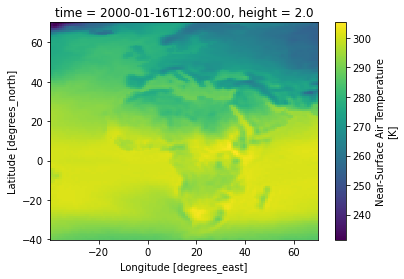

In [4]:
ds.tas.isel(time=0).plot()

## Show Provenance

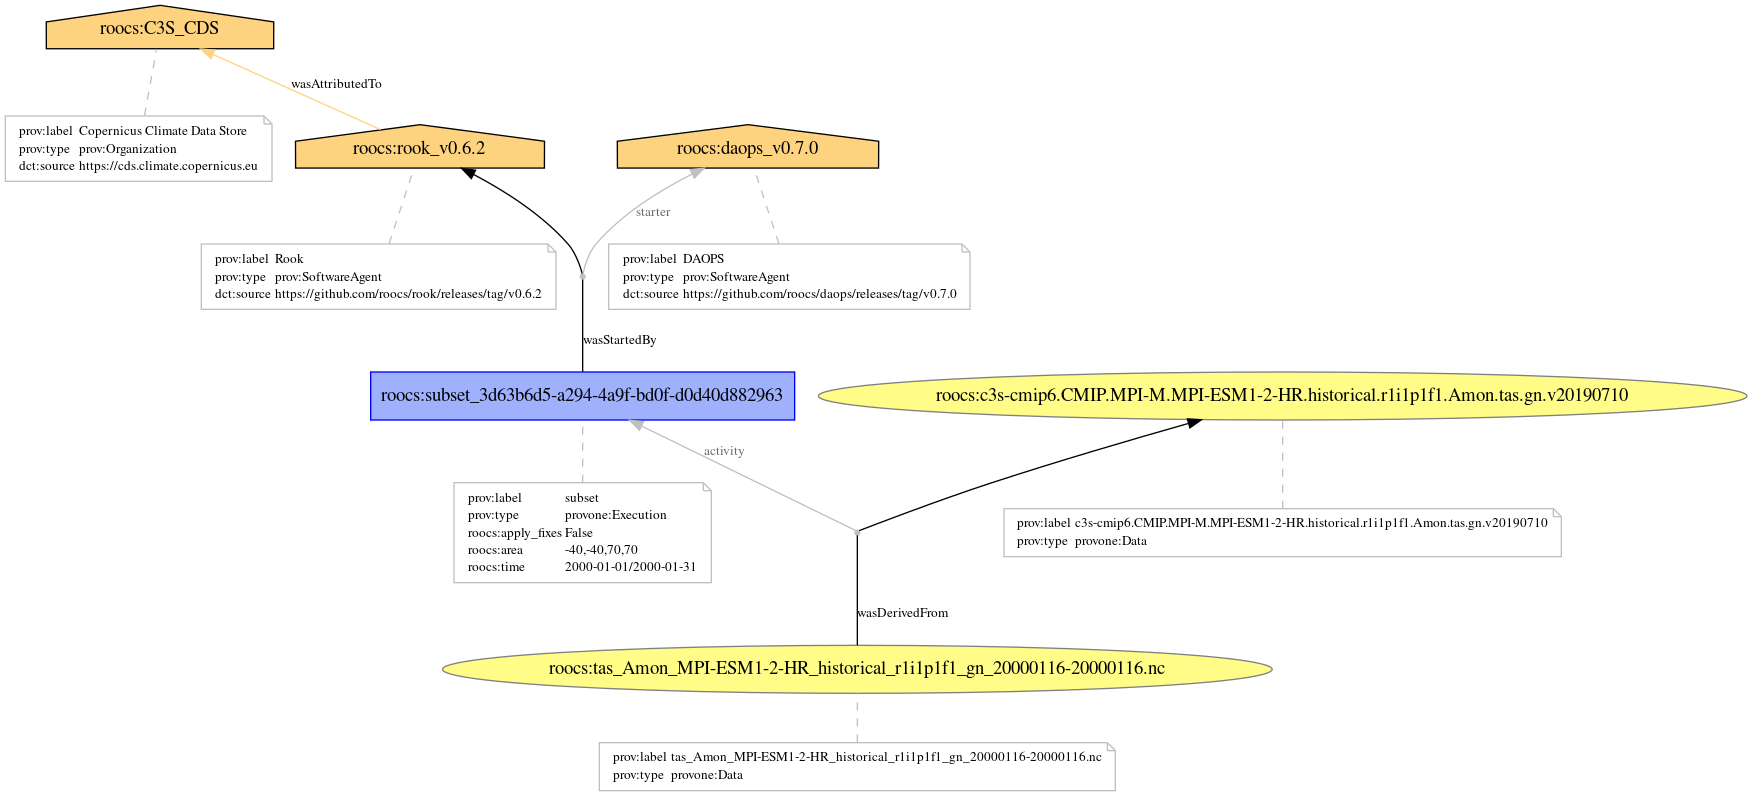

In [5]:
from IPython.display import Image
Image(resp.provenance_image())